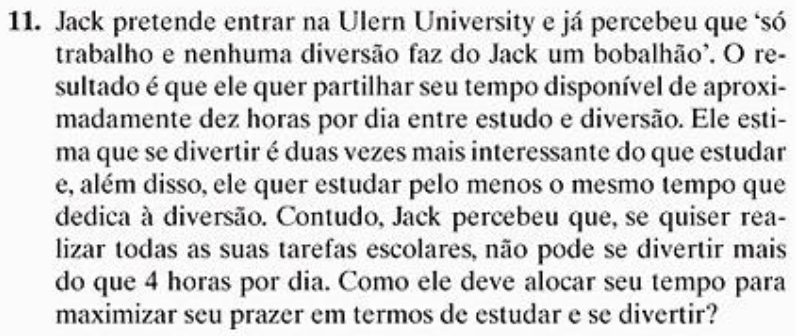

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Otima_Tempo_Jack')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes das atividades para referência
atividades = ['estudo', 'diversao']

# A métrica de "prazer" ou "interesse" é relativa.
# Definimos o prazer de estudar como 1 e o de se divertir como 2 (o dobro).
pontos_de_prazer = {'estudo': 1, 'diversao': 2}

# Limites de tempo
tempo_total_disponivel = 10 # horas
limite_max_diversao = 4     # horas

In [4]:
# 1. Variáveis de Decisão
# Horas a serem alocadas para cada atividade
horas_alocadas = model.continuous_var_dict(atividades, name='Horas')


# 2. Função Objetivo
# Maximizar o prazer total
expressao_prazer = (pontos_de_prazer[a] * horas_alocadas[a] for a in atividades)
soma_prazer_total = model.sum(expressao_prazer)
model.maximize(soma_prazer_total)


# 3. Restrições

# Restrição 1: Tempo Total Disponível
# A soma das horas nas atividades não pode exceder 10 horas.
expressao_tempo_total = (horas_alocadas[a] for a in atividades)
soma_tempo_total = model.sum(expressao_tempo_total)
restr_tempo_total_logica = soma_tempo_total <= tempo_total_disponivel
model.add_constraint(restr_tempo_total_logica, ctname='limite_tempo_total')

# Restrição 2: Relação Estudo vs. Diversão
# Jack quer estudar pelo menos o mesmo tempo que se diverte (E >= D).
restr_ratio_ED_logica = horas_alocadas['estudo'] - horas_alocadas['diversao'] >= 0
model.add_constraint(restr_ratio_ED_logica, ctname='ratio_estudo_diversao')

# Restrição 3: Limite Máximo de Diversão
# Jack não pode se divertir por mais de 4 horas.
restr_max_diversao_logica = horas_alocadas['diversao'] <= limite_max_diversao
model.add_constraint(restr_max_diversao_logica, ctname='limite_max_diversao')

docplex.mp.LinearConstraint[limite_max_diversao](Horas_diversao,LE,4)

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 3 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

------ SOLUÇÃO ÓTIMA ------

solution for: Alocacao_Otima_Tempo_Jack
objective: 14
status: OPTIMAL_SOLUTION(2)
Horas_estudo=6.000
Horas_diversao=4.000

